## Predicting House Price
For this practice, we will be using the Melbourne Housing Full data set. Below is the link for this data set. 

https://www.kaggle.com/anthonypino/melbourne-housing-market


In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Melbourne_housing_FULL.csv to Melbourne_housing_FULL.csv


In [0]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

In [0]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

According to the information of the data set, we can see that some features have null values, like price, Distance, postcode, Bedroom2, Bathroom, Car, Landsize, Building Area, Year Built, ConcilArea, Lat and Long, Regionname, and Propertycount.Below are some data cleaning steps for this data set. 

---



1.   'Rooms' and 'Bedroom2' are kind of the same information. After checking the description of the data set, 'Bedroom2' is information about number of bedrooms scraped from a different source. Since I do not want to confus the model, I will drop the 'Bedroom2' column. 
2.   There are null values in 'Price' column. I do not want to drop those rows with null price values. Therefore, I will fill it with the mean of the price column. 
3.   'Distance' have null value as well. I will fill this null value with mean of distance. 
4.   'Postcode' have one null value. I will check which 'Suburb' area this listing is located, and then use the same postcode. 
5.    'Bathroom' and 'Car' columns have null values. I will fill null values with mean of each column, and round up the mean to integer. 
6.    'Landsize' and 'BuildingArea' both have null values. Also, they have a min of 0, which is not make sense for a house to have 0 Landsize and 0 BuildingArea. I will fill both null and 0 entries with mean. 
7.    'YearBuilt', 'CouncilArea', and 'Regionname' have null values. I will fill null with most common entries. 
8.    'Lat', 'Long', and 'Propertycount' null values will fill with mean. 








In [0]:
df.drop(['Bedroom2'],axis=1, inplace=True) #Drop Bedroom2
df['Price'].fillna(df['Price'].mean(), inplace=True) #Fill null Price
df['Distance'].fillna(df['Distance'].mean(), inplace=True) #Fill null Distance
#We can use prediction model to fill null, like KNN. 
df['Postcode'].fillna(3060, inplace=True) #Fill null Postcode
df['Bathroom'].fillna(round(df['Bathroom'].mean()), inplace=True) #Fill null Bathroom
df['Car'].fillna(round(df['Car'].mean()), inplace=True) #Fill null Car
df['Landsize'].fillna(df['Landsize'].mean(), inplace=True) #Fill null Landsize
df['BuildingArea'].fillna(df['BuildingArea'].mean(), inplace=True) #Fill null BuildingArea
df.loc[df['Landsize'] == 0, 'Landsize'] = df['Landsize'].mean() #Fill 0 Landsize
df.loc[df['BuildingArea'] == 0, 'BuildingArea'] = df['BuildingArea'].mean() #Fill 0 BuildingArea
df['YearBuilt'].fillna(df['YearBuilt'].value_counts().index[0], inplace=True) #Fill null YearBuilt
df['CouncilArea'].fillna(df['CouncilArea'].value_counts().index[0], inplace=True) #Fill null CouncilArea
df['Regionname'].fillna(df['Regionname'].value_counts().index[0], inplace=True) #Fill null gegionname
df['Lattitude'].fillna(df['Lattitude'].mean(), inplace=True) #Fill null Lattitude
df['Longtitude'].fillna(df['Longtitude'].mean(), inplace=True) #Fill null Longtitude
df['Propertycount'].fillna(df['Propertycount'].mean(), inplace=True) #Fill null Propertycount

In [8]:
#Check null for the whole data set again. 
df.isnull().sum().sum()

0

Next, let's look at the data type for each feature, and seperate them into Categorial features and Continous features. 

In [9]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

For features like Postcode, YearBuilt, they should be objects and belongs to Catagorial features. The rest will be Continous features. 

In [10]:
df['Postcode'] = df['Postcode'].astype(object)
df['YearBuilt'] = df['YearBuilt'].astype(object)

df_cata = df.select_dtypes(include='object')
df_cont = df.select_dtypes(include=['float64','int64'])

print(df_cata.dtypes)
print(df_cont.dtypes)

Suburb         object
Address        object
Type           object
Method         object
SellerG        object
Date           object
Postcode       object
YearBuilt      object
CouncilArea    object
Regionname     object
dtype: object
Rooms              int64
Price            float64
Distance         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
Lattitude        float64
Longtitude       float64
Propertycount    float64
dtype: object


Next, let's explore the data set a little bit. We will produce below plots and get some insight from the data set.



1.   Numbe of houses in each Suburb, ConcilArea, RegionName, postcode, and house type.
2.   Average house price in each Suburb, number of rooms, number of bathroom, number of car spots. 
3.   Will also look at scatter plots to check relationship between price vs. rooms, Distance, bathroom, car, landsize, building area, propertycount. 



[Text(0, 0, 'h'), Text(0, 0, 'u'), Text(0, 0, 't')]

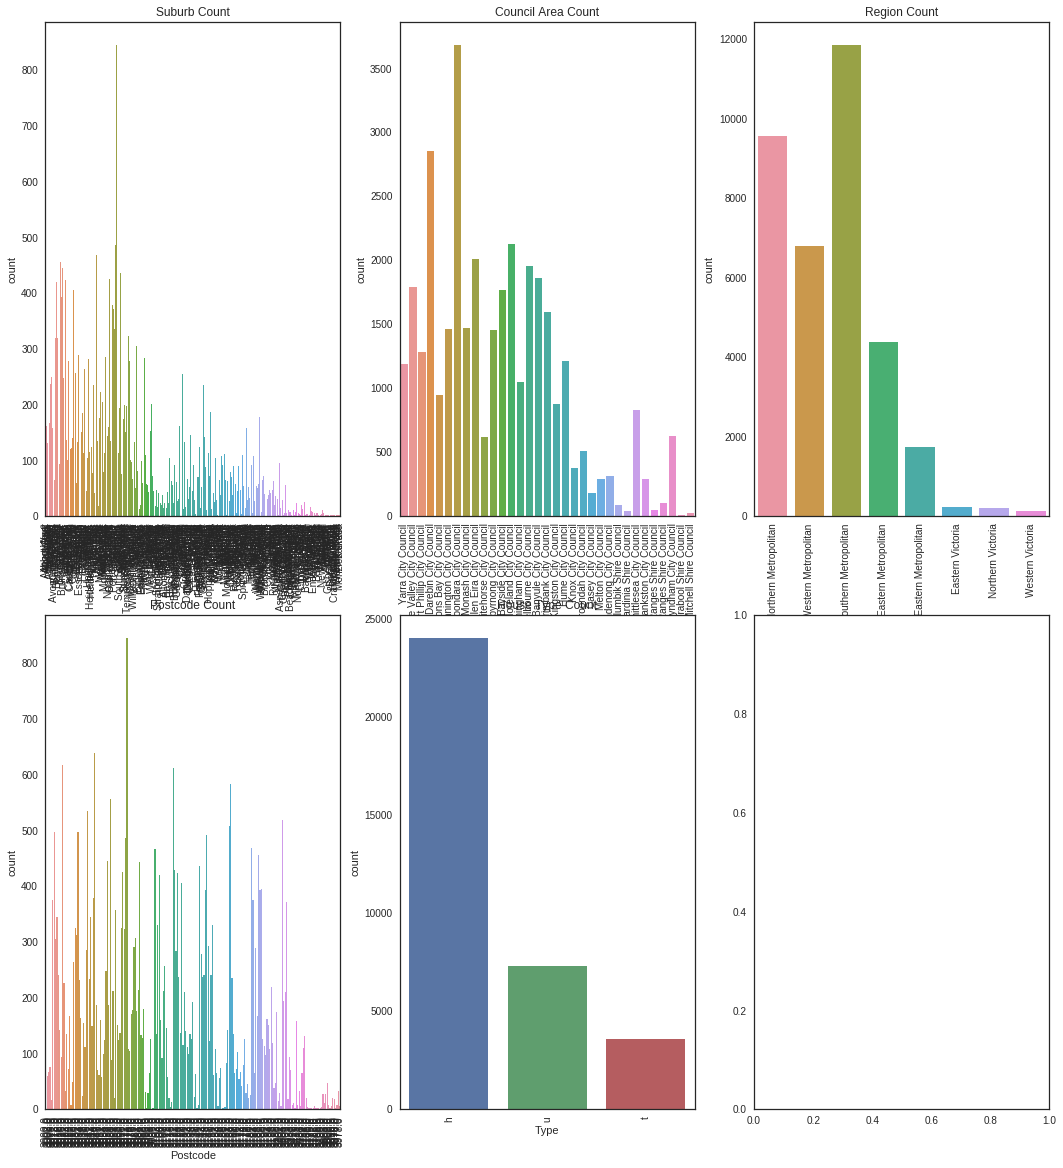

In [11]:
fig, ax = plt.subplots(2, 3,figsize=(18,20))

sns.countplot(x="Suburb", data=df_cata, ax=ax[0][0])
ax[0,0].set_title("Suburb Count", fontsize=12)
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=90)

sns.countplot(x="CouncilArea", data=df_cata, ax=ax[0][1])
ax[0,1].set_title("Council Area Count", fontsize=12)
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=90)

sns.countplot(x="Regionname", data=df_cata, ax=ax[0][2])
ax[0,2].set_title("Region Count", fontsize=12)
ax[0,2].set_xticklabels(ax[0,2].get_xticklabels(), rotation=90)

sns.countplot(x="Postcode", data=df_cata, ax=ax[1][0])
ax[1,0].set_title("Postcode Count", fontsize=12)
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=90)

sns.countplot(x="Type", data=df_cata, ax=ax[1][1])
ax[1,1].set_title("House Type Count", fontsize=12)
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=90)

In [0]:
suburb_unique = df['Suburb'].sort_values().unique()
room_unique = df['Rooms'].sort_values().unique()
bathroom_unique = df['Bathroom'].sort_values().unique()
car_unique = df['Car'].sort_values().unique()

suburb_average = list()
room_average = list()
bathroom_average = list()
car_average = list()

#Double-check This part.
for i in range(0,len(suburb_unique)):
    total_price = df.loc[df['Suburb'] == suburb_unique[i], 'Price'].sum()
    divider = df['Suburb'].loc[df['Suburb'] == suburb_unique[i]].value_counts().item()
    suburb_average.append(total_price/divider)
    
for i in range(0,len(room_unique)):
    total_price = df.loc[df['Rooms'] == room_unique[i], 'Price'].sum()
    divider = df['Rooms'].loc[df['Rooms'] == room_unique[i]].value_counts().item()
    room_average.append(total_price/divider)
    
for i in range(0,len(bathroom_unique)):
    total_price = df.loc[df['Bathroom'] == bathroom_unique[i], 'Price'].sum()
    divider = df['Bathroom'].loc[df['Bathroom'] == bathroom_unique[i]].value_counts().item()
    bathroom_average.append(total_price/divider)
    
for i in range(0,len(car_unique)):
    total_price = df.loc[df['Car'] == car_unique[i], 'Price'].sum()
    divider = df['Car'].loc[df['Car'] == car_unique[i]].value_counts().item()
    car_average.append(total_price/divider)

[Text(0, 0, '0.0'),
 Text(0, 0, '1.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '6.0'),
 Text(0, 0, '7.0'),
 Text(0, 0, '8.0'),
 Text(0, 0, '9.0'),
 Text(0, 0, '10.0'),
 Text(0, 0, '11.0'),
 Text(0, 0, '12.0'),
 Text(0, 0, '18.0'),
 Text(0, 0, '26.0')]

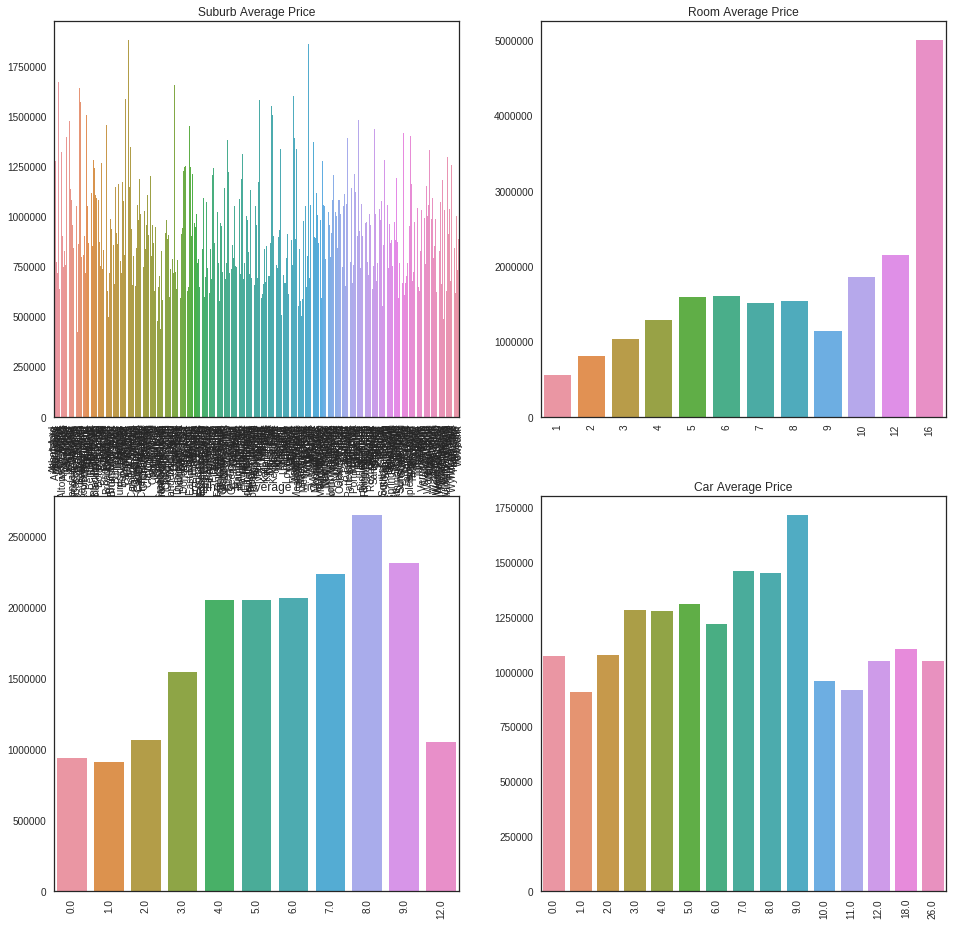

In [13]:
fig, ax = plt.subplots(2, 2,figsize=(16,16))

sns.barplot(x=suburb_unique, y=suburb_average, ax=ax[0][0])
ax[0,0].set_title("Suburb Average Price", fontsize=12)
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=90)

sns.barplot(x=room_unique, y=room_average, ax=ax[0][1])
ax[0,1].set_title("Room Average Price", fontsize=12)
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=90)

sns.barplot(x=bathroom_unique, y=bathroom_average, ax=ax[1][0])
ax[1,0].set_title("Bathroom Average Price", fontsize=12)
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=90)

sns.barplot(x=car_unique, y=car_average, ax=ax[1][1])
ax[1,1].set_title("Car Average Price", fontsize=12)
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=90)

Text(0.5, 1.0, 'Price vs. Propertycount')

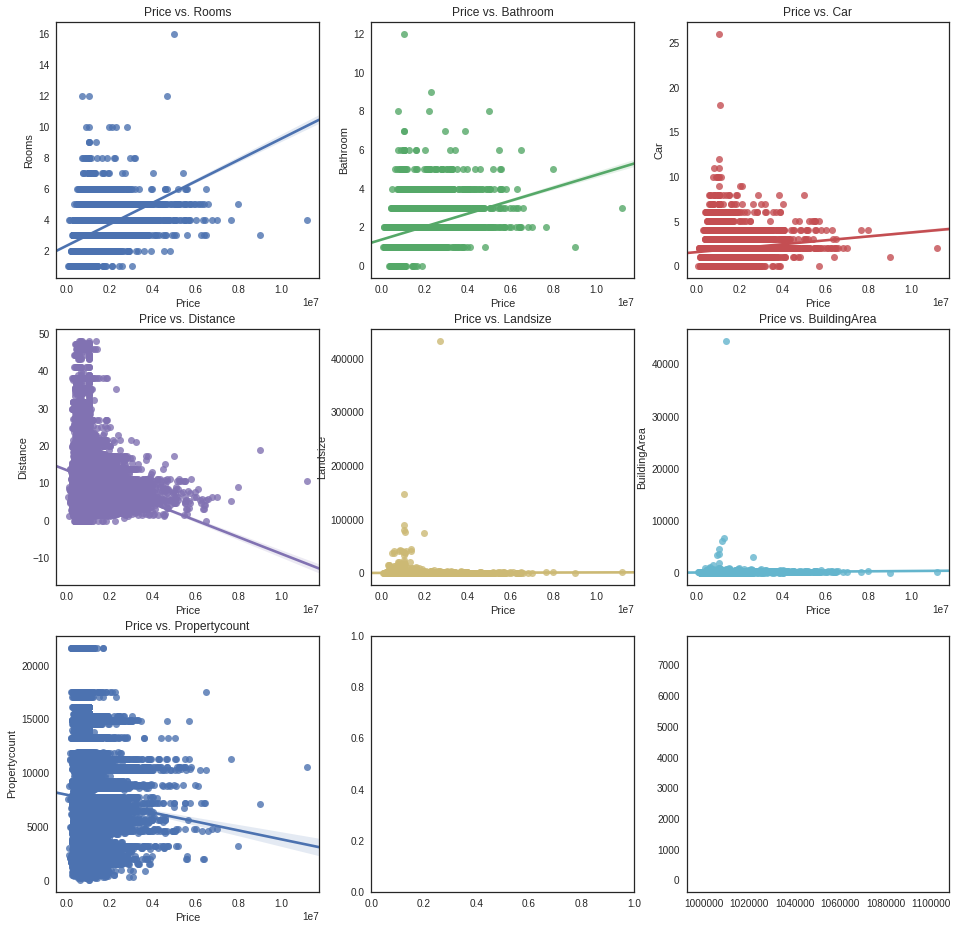

In [14]:
fig, ax = plt.subplots(3, 3,figsize=(16,16))

sns.regplot(x='Price', y='Rooms', data=df_cont, ax=ax[0][0])
ax[0,0].set_title("Price vs. Rooms", fontsize=12)

sns.regplot(x='Price', y='Bathroom', data=df_cont, ax=ax[0][1])
ax[0,1].set_title("Price vs. Bathroom", fontsize=12)

sns.regplot(x='Price', y='Car', data=df_cont, ax=ax[0][2])
ax[0,2].set_title("Price vs. Car", fontsize=12)

sns.regplot(x='Price', y='Distance', data=df_cont, ax=ax[1][0])
ax[1,0].set_title("Price vs. Distance", fontsize=12)

sns.regplot(x='Price', y='Landsize', data=df_cont, ax=ax[1][1])
ax[1,1].set_title("Price vs. Landsize", fontsize=12)

sns.regplot(x='Price', y='BuildingArea', data=df_cont, ax=ax[1][2])
ax[1,2].set_title("Price vs. BuildingArea", fontsize=12)

sns.regplot(x='Price', y='Propertycount', data=df_cont, ax=ax[2][0])
ax[2,0].set_title("Price vs. Propertycount", fontsize=12)

We have cleaned our data set a little bit. Now, let's look at the correlations between each features and how they compare it to the Price. 

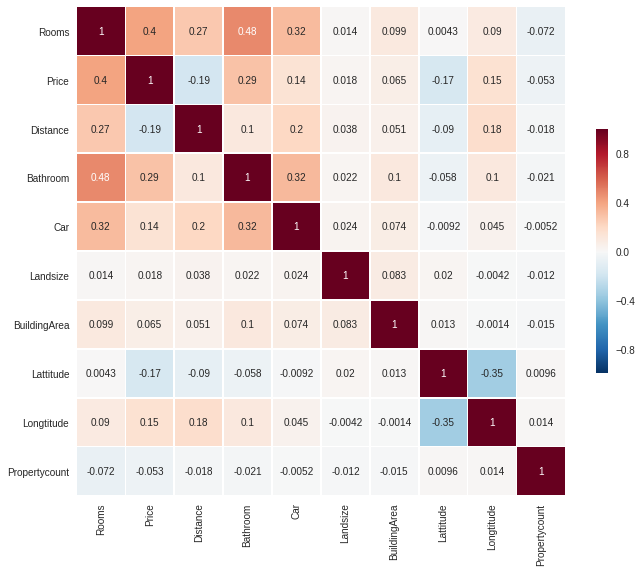

In [15]:
corr = df.corr()

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

df_cata_dummy = pd.get_dummies(df_cata)
df_final = pd.concat([df_cata_dummy, df_cont], axis=1, join='outer')

from sklearn.model_selection import train_test_split

X = df_final.drop('Price', axis=1)
Y = df_final['Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

We have high cardility categorical features in our data set, like Postcodes, Suburb, and etc.  This would cause a problem to our model if we just get_dummies and fit the model, because 1) it will consume all memory of the colab instance or computer memory if run locally, resulting the kernel crashed. 2) After we convert our categorical features to numeric dummies, some of the dummy features may only have a few meaningful value (1), which the new dummy feature will not do much good to our model. 

Therefore, we will try below two methods to help us reduce the dimension of our final data set after converting categorical features to numeric dummies. 


1.   We will clean our categorical feature before converting to dummies. For examples, we only keep a few high frequency Postcodes, and then categorized other Postcodes as 'Others'. Or delete some categorial features like 'SellG', 
2.   We will also try PCA or MCA to reduce the dimension of dummie features and see if this will help colab run our model much better. 



---

Next, we will try to clean up our categorical features. SellG and Address are two features that we can drop at the beginning because we normally do not need think kind of information to predict house price. 


In [0]:
#Drop these three which have less impact to our outcome. 
df_cata.drop(['SellerG','Address','Date'], axis=1, inplace=True)

In [0]:
#Create new features that we will use later. 
df_cata['Suburb_reduced'] = df_cata['Suburb']
df_cata['Postcode_reduced'] = df_cata['Postcode']
df_cata['YearBuilt_reduced'] = df_cata['YearBuilt']
df_cata['CouncilArea_reduced'] = df_cata['CouncilArea']
df_cata['Regionname_reduced'] = df_cata['Regionname']

In [18]:
#Find out the top 9 most frequent values in the 'Suburb feature'
df_cata['Suburb'].value_counts().head(9)

Reservoir         844
Bentleigh East    583
Richmond          552
Glen Iris         491
Preston           485
Kew               467
Brighton          456
Brunswick         444
South Yarra       435
Name: Suburb, dtype: int64

In [19]:
df_cata['Postcode'].value_counts().head(9)

3073.0    844
3046.0    638
3020.0    617
3121.0    612
3165.0    583
3058.0    556
3040.0    535
3204.0    518
3163.0    508
Name: Postcode, dtype: int64

In [20]:
df_cata['YearBuilt'].value_counts().head(9)

1970.0    20796
1960.0     1260
1950.0     1089
1980.0      726
1900.0      606
2000.0      571
1920.0      545
1930.0      531
1910.0      460
Name: YearBuilt, dtype: int64

In [21]:
df_cata['CouncilArea'].value_counts().head(9)

Boroondara City Council       3678
Darebin City Council          2851
Moreland City Council         2122
Glen Eira City Council        2006
Melbourne City Council        1952
Banyule City Council          1861
Moonee Valley City Council    1791
Bayside City Council          1764
Brimbank City Council         1593
Name: CouncilArea, dtype: int64

In [22]:
df_cata['Regionname'].value_counts().head(9)

Southern Metropolitan         11839
Northern Metropolitan          9557
Western Metropolitan           6799
Eastern Metropolitan           4377
South-Eastern Metropolitan     1739
Eastern Victoria                228
Northern Victoria               203
Western Victoria                115
Name: Regionname, dtype: int64

In [0]:
#We will count the top 9 most frequent values in columns, and replace anything lower than this top 9 values with 'others'
suburb_list = ['Reservoir','Bentleigh East','Richmond','Glen Iris','Preston','Kew','Brighton','Brunswick','South Yarra']
code_list = [3073, 3046, 3020, 3121, 3165, 3058, 3040, 3204, 3163]
year_list = [1970, 1960, 1950, 1980, 1900, 2000, 1920, 1930, 1910]
council_list = ['Boroondara City Council', 'Darebin City Council','Moreland City Council',
             'Glen Eira City Council','Melbourne City Council','Banyule City Council',
             'Moonee Valley City Council','Bayside City Council','Brimbank City Council']
region_list = ['Southern Metropolitan','Northern Metropolitan','Western Metropolitan',
              'Eastern Metropolitan','South-Eastern Metropolitan','Eastern Victoria',
              'Northern Victoria','Western Victoria']


for item in df_cata['Suburb_reduced'].unique():
    if not item in suburb_list:
        df_cata['Suburb_reduced'].replace(item,'others',inplace=True)
        
for item in df_cata['Postcode_reduced'].unique():
    if not item in code_list:
        df_cata['Postcode_reduced'].replace(item,'others',inplace=True)
        
for item in df_cata['YearBuilt_reduced'].unique():
    if not item in year_list:
        df_cata['YearBuilt_reduced'].replace(item,'others', inplace=True)

for item in df_cata['CouncilArea_reduced'].unique():
    if not item in council_list:
        df_cata['CouncilArea_reduced'].replace(item,'others', inplace=True)
        
for item in df_cata['Regionname_reduced'].unique():
    if not item in region_list:
        df_cata['Regionname_reduced'].replace(item,'others', inplace=True)


In [0]:
#Seperate to two different date set. Once with regular dummy categorical features, and one with reduced dummy categorical features. 

df_cata_reduced = df_cata[df_cata.columns[df_cata.columns.isin(['Suburb_reduced',
                                                                'Type', 'Method',
                                                                'Postcode_reduced',
                                                                'YearBuilt_reduced',
                                                                'CouncilArea_reduced',
                                                                'Regionname_reduced'])]]

df_cata_regular = df_cata[df_cata.columns[df_cata.columns.isin(['Suburb',
                                                                'Type', 'Method',
                                                                'Postcode',
                                                                'YearBuilt',
                                                                'CouncilArea',
                                                                'Regionname'])]]

df_cata_reduced_dummy = pd.get_dummies(df_cata_reduced) 
df_final_reduced = pd.concat([df_cata_reduced_dummy, df_cont], axis=1, join='outer')

df_cata_regular_dummy = pd.get_dummies(df_cata_regular)
df_final_regular = pd.concat([df_cata_regular_dummy, df_cont], axis=1, join='outer')

In [25]:
print(df_cata_reduced_dummy.shape)
print(df_cata_regular_dummy.shape)

(34857, 60)
(34857, 775)


In [0]:
from sklearn.model_selection import train_test_split

X_reduced = df_final_reduced.drop('Price', axis=1)
Y_reduced = df_final_reduced['Price']

X_regular = df_final_regular.drop('Price',axis=1)
Y_regular = df_final_regular['Price']

X_train_reduced, X_test_reduced, Y_train_reduced, Y_test_reduced = train_test_split(X_reduced, Y_reduced, test_size=0.3)
X_train_regular, X_test_regular, Y_train_regular, Y_test_regular = train_test_split(X_regular, Y_regular, test_size=0.3)

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

GBR_params = {'loss':['ls','lad', 'huber', 'quantile'], 'n_estimators':[100,200,500],
              'max_depth':[2,4], 'subsample':[0.1,0.2,0.3]}
              
GBR_grid = GridSearchCV(GradientBoostingRegressor(), GBR_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=20)
GBR_grid.fit(X_train_reduced, Y_train_reduced)

print(('The best parameters for this model is: {}\n'
      'The best score for this model is: {}').format(GBR_grid.best_params_, GBR_grid.best_score_))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

The best parameters for this model is: {'loss': 'huber', 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.3}
The best score for this model is: -150177342186.4926


In [30]:
GBR = GradientBoostingRegressor(loss='huber', n_estimators=500, max_depth=4, subsample=0.3)
GBR.fit(X_train_reduced, Y_train_reduced)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=0.3, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [31]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test_reduced, GBR.predict(X_test_reduced))
print("MSE: %.4f" % mse)
print('R^2 =',metrics.explained_variance_score(Y_test_reduced,GBR.predict(X_test_reduced)))

MSE: 153049300527.8994
R^2 = 0.5332830028575766


In [40]:
GBR_feature_importances = pd.DataFrame(GBR.feature_importances_,
                                       index=X_train_reduced.columns,
                                       columns=['importance']).sort_values('importance',ascending=False)

print(GBR_feature_importances)

                                               importance
Distance                                         0.138950
Regionname_reduced_Southern Metropolitan         0.115335
Rooms                                            0.112478
BuildingArea                                     0.073077
Type_u                                           0.070966
Lattitude                                        0.069336
Landsize                                         0.068015
Longtitude                                       0.060371
Type_h                                           0.053172
Regionname_reduced_Eastern Metropolitan          0.030731
Bathroom                                         0.026345
Propertycount                                    0.026278
Method_SN                                        0.023967
Car                                              0.015359
Method_SP                                        0.012249
CouncilArea_reduced_Bayside City Council         0.009757
CouncilArea_re

Accoridng to the above result, we can see that there is lots of imprvements we can do to our model. Due to processing power limit, I am not able to run the same gridsearchCV for the regular dummy data set because this data set is much larger than the reduced data set. However, I would like to try the Random Forst model and see if this model will perform better than the Gradient Boosting Regressor. We will also use the reduced data set.

In [35]:
from sklearn.ensemble import RandomForestRegressor

RF_params = {'criterion':['mse'], 'n_estimators':[100,200,500,1000],
              'max_depth':[1,2,3,4], }
              
RF_grid = GridSearchCV(RandomForestRegressor(), RF_params, cv=3, scoring='neg_mean_squared_error',n_jobs=-1, verbose=20)
RF_grid.fit(X_train_reduced, Y_train_reduced)

print(('The best parameters for this model is: {}\n'
      'The best score for this model is: {}').format(RF_grid.best_params_, RF_grid.best_score_))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

The best parameters for this model is: {'criterion': 'mse', 'max_depth': 4, 'n_estimators': 200}
The best score for this model is: -186514359476.99323


In [36]:
RF = RandomForestRegressor(criterion='mse', n_estimators=200, max_depth=4)
RF.fit(X_train_reduced, Y_train_reduced)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [37]:
mse_RF = mean_squared_error(Y_test_reduced, RF.predict(X_test_reduced))
print("MSE: %.4f" % mse_RF)
print('R^2 =',metrics.explained_variance_score(Y_test_reduced,RF.predict(X_test_reduced)))

MSE: 196475230326.7773
R^2 = 0.39898446936867515


In [41]:
RF_feature_importances = pd.DataFrame(RF.feature_importances_,
                                       index=X_train_reduced.columns,
                                       columns=['importance']).sort_values('importance',ascending=False)

print(RF_feature_importances)

                                                importance
Regionname_reduced_Southern Metropolitan          0.365078
Rooms                                             0.286933
Distance                                          0.141386
Type_u                                            0.112829
Regionname_reduced_Eastern Metropolitan           0.028697
Landsize                                          0.024512
BuildingArea                                      0.022258
Longtitude                                        0.008513
Type_h                                            0.002855
Bathroom                                          0.002706
Method_SN                                         0.001248
Propertycount                                     0.000808
Car                                               0.000723
Suburb_reduced_Brighton                           0.000521
Method_SP                                         0.000442
Lattitude                                         0.0002

After running the same data set with Random Forest Regressor, the performance is not better than our Gradient Boosting Regressor result. It may be due to the features included in our data set. 


---

### Future Research
We tried Gradient Boosting Regressor and Random Forest Regressor in this practice. Both model did not return a very good score based on the existing data set. For future research, we can try to improve below items and increase the performance of our models. 



1.   We need to do a better job for data cleaning. According to the plots we generated previously, there are several outliners in our data set. These outliners may effect our model. We can look back at these outliners in the future and decide how to clean up these outliners. 
2.   From the plots we generated previously, some of the continuous features in our data set does not have a linear relationship with the outcome. In the future, we can try to transform these features and make them linear to the our outcome, which will help reduce the MSE. 
3.   In the future, we can do a better job to deal with our categorical features. Due to time limit, I was not able to perform MCA fit to dummy features and test the performance of the MCA data set. Furture reseach can try MCA and see if MCA is able to reduce our data dimension and provide us a cleaner data set. 
4.   In the future, we can also try linear regression model to fit the data set. However, we need to perform feature engineering first and make sure our data set meet all the linear regression assumptions. 
5.   In the future, we can also try different methods to transform categorical features other than get dummies.
6.   If possible, we can also try neural networks for build a model for our data set. 

